In [1]:
# ME17B158 - Omkar Nath

#  Classification : Nearest Neighbors and Naive Bayes 

## Classification using Nearest Neighbors

(a) Perform k-Nearest neighbours on the given dataset($X_{knn}$ and $y_{knn}$: where $X_{knn}$ stores feature vectors representing the movies and  $y_{knn}$ stores the 0-1 labelling for each movie) for binary classification of movies, for classifiying whether a given movie is a comedy(label 1) or not a comedy(label 0) . Split the dataset into train(80%), validation(10%) and test sets(10%).Run k-Nearest neighbours for different k values (1,3,7,15,31,63). Select the k, using validation set, which returns the best accuracy score. 

(i)  Report all the validation accuracies for all the values of k. 
<br>(ii) Report accuracy score by performing k-NN on the test dataset using the best chosen k value. 

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X_df = pd.read_csv("X_knn.csv", sep = ' ', header=None)
y_df = pd.read_csv("y_knn.csv", header=None)

In [4]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
0,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
1,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
2,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
3,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
4,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825


In [5]:
y_df.head()

,0
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


In [6]:
X = np.array(X_df)
y = np.array(y_df)[:,0]

In [7]:
# Splitting the Data
X_train, X_val, X_test = np.split(X, [int(.8 * len(X)), int(.9 * len(X))])
y_train, y_val, y_test = np.split(y, [int(.8 * len(y)), int(.9 * len(y))])

In [8]:
k_vals = [1,3,7,15,31,63]
val_acc = []

for k in k_vals:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_val_pred = classifier.predict(X_val)
    val_acc.append(accuracy_score(y_val, y_val_pred))

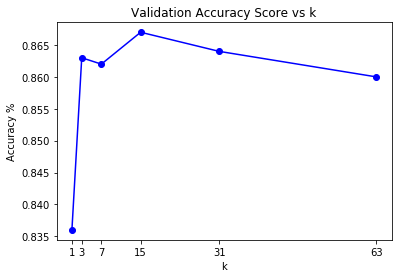

In [9]:
plt.plot(k_vals, val_acc, 'bo-')
plt.xticks(k_vals)
plt.title("Validation Accuracy Score vs k")
plt.xlabel("k")
plt.ylabel("Accuracy %")
plt.show()

In [10]:
# Score for different values k
k_acc = {"k": k_vals, "Validation Accuracy": val_acc}
print(pd.DataFrame(k_acc))

    k  Validation Accuracy
0   1                0.836
1   3                0.863
2   7                0.862
3  15                0.867
4  31                0.864
5  63                0.860


In [11]:
best_k = k_vals[val_acc.index(max(val_acc))]
best_acc = max(val_acc)
print("The k with the best acc of ",best_acc," is ",best_k)

The k with the best acc of  0.867  is  15


In [12]:
# Using the best k value
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)

print("Test accuracy = {}%".format(accuracy*100))

Test accuracy = 86.7%


Write the results here:
k=15 is the best as it gives the highest accuracy

(b) State why using an even value of k in k-NN should not be chosen

With even k, it is possible for a perfect split i.e. half belonging to one class and half belonging to another. To avoid this, we always prefer odd k.

## Learning Naive Bayes' classifier  

### From Continuous Distribution of data

Here, the distribution of the data( $X$ represents the datapoints and $Y$ represents the 0-1 binary-class label; where 0 being the negative class and 1 being the positive class) is already known.
<br>Consider the following one-dimensional(1-D) Gaussian distributions where means and variances are unknown. You need to estimate means($\mu_-$: for negative class and  $\mu_+$: for positive class) and variances ($\sigma^{2}_{-}$: for negative class and $\sigma^{2}_+$: for positive class) from the given data : 
<br> (1) Assume $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ 
<br>(2) Assume $X|Y_{Y=1} \sim \mathcal{N}(\mu_+ , \sigma^{2}_+)$


*Generating artificial datasets in the next cell *

In [13]:
## This cell is for generating datasets. Students should not change anything in this cell. 
## You can compare your mean and variance estimates by the actual ones used to generate these datasets

X_pos = np.random.randn(1000,1)+np.array([[2.]])
X_neg = np.random.randn(1000,1)+np.array([[4.]])
X_train_pos = X_pos[:900]
X_train_neg = X_neg[:900]
X_test_pos = X_pos[900:]
X_test_neg = X_neg[900:]
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_train = np.concatenate(( np.ones(900),np.zeros(900) ))
Y_test = np.concatenate(( np.ones(100), np.zeros(100) ))

## X_train, X_test, Y_train, Y_test are your datasets to work with ####



<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Utilize the training dataset to estimate the means($\hat{\mu_+}$,$\hat{\mu_-}$) and variances($\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$) for both positive and negative classes  
b)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$ 
<br>c)Estimate the classifier funtion/posterior probability:  $P(Y=1|X = x)$  ⟶ which could be referred to as $\hat{\eta(x)}$
<br>d)Find out the threshold value($x^*$) for classification by equating the estimated classifier function($\hat{\eta(x)}$)  with threshold probability of 0.5
<br>e)Classify the test dataset into the two classes using this threshold value($x^*$) and find out the **accuracy** of the prediction 

Return back:  $\hat{\mu_+}$, $\hat{\mu_-}$, $\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$, $\hat{a}$, $x^*$ and accuracy from the code written 

*Hint: $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ implies $P_{X|Y=0} = \mathcal{N}(\mu_- , \sigma^{2}_-) $*


In [14]:
# Class Wise examples
n1 = sum(Y_train==np.ones(len(Y_train)))
n0 = len(Y_train) - n1

In [15]:
# Estimating Means
sum1 = sum([x[0] for i,x in enumerate(X_train) if Y_train[i]==1])
mean1 = float(sum1)/n1

sum0 = sum([x[0] for i,x in enumerate(X_train) if Y_train[i]==0])
mean0 = float(sum0)/n0

print("Estimated mean of positive class: ", mean1)
print("Estimated mean of negative class: ", mean0)

Estimated mean of positive class:  1.9795075854876019
Estimated mean of negative class:  4.072973982524726


In [16]:
# Estimating Variances
sum1 = sum([(x[0]-mean1)**2 for i,x in enumerate(X_train) if Y_train[i]==1])
var1 = float(sum1)/(n1-1)

sum0 = sum([(x[0]-mean0)**2 for i,x in enumerate(X_train) if Y_train[i]==0])
var0 = float(sum0)/(n0-1)

print("Estimated variance of positive class: ", var1)
print("Estimated variance of negative class: ", var0)

Estimated variance of positive class:  1.005749756360587
Estimated variance of negative class:  0.9424458215491619


In [17]:
# Estimating Prior Probabilities
pr_pro1 = n1/len(Y_train)
pr_pro0 = n0/len(Y_train)
print("Prior probability of the positive class:", pr_pro1)
print("Prior probability of the negative class:", pr_pro0)

Prior probability of the positive class: 0.5
Prior probability of the negative class: 0.5


In [18]:
# Gaussian Function
def Gaussian(x, mu, var):
    return (1/np.sqrt(2*np.pi*var))*np.exp(-1*((x-mu)**2)/(2*var))

In [19]:
# Threshold Value
x_vals = np.linspace(mean1, mean0, 1000)
differences = [None]*1000

for i, x in enumerate(x_vals):
    prob = (pr_pro1*Gaussian(x, mean1, var1))/(pr_pro1*Gaussian(x, mean1, var1)+pr_pro0*Gaussian(x, mean0, var0))
    differences[i] = abs(0.5 - prob)
    
thresh = x_vals[differences.index(min(differences))]
print("Threshold value = ", thresh)

Threshold value =  3.027288564985662


In [20]:
# Data Classification
train_pred = X_train <= thresh
train_result = train_pred[:, 0]==Y_train
train_acc = np.mean(train_result)
print("Training accuracy = {} %".format(train_acc*100))

test_pred = X_test <= thresh
test_result = test_pred[:, 0]==Y_test
test_acc = np.mean(test_result)
print("Test accuracy = {} %".format(test_acc*100))

Training accuracy = 85.27777777777777 %
Test accuracy = 85.5 %


Write results here:

* Estimated mean of positive class:  2.0005368139717863
* Estimated mean of negative class:  4.0440233172920985

* Estimated variance of positive class:  1.0025901106283377
* Estimated variance of negative class:  1.0181743144310418

* Threshold value =  3.0212572996142644

* Training accuracy = 84.55555555555556 %
* Test accuracy = 83.5 %

### From Discrete distribution of data

Unlike the first exercise for learning the Naive Bayes' classifier where we dealt with continuous distribution of data, here you need to work with discrete data, which means finding Probability Mass Distribution(PMF). 

Age  | Income | Status  | Buy
-----|--------|-------- |----
<=20 |  low   | students| yes
<=20 |  high  | students| yes
<=20 | medium | students| no
<=20 | medium | married | no
<=20 |  high  | married | yes
21-30|  low   | married | yes
21-30|  low   | married | no 
21-30| medium | students| no
21-30|  high  | students| yes
 >30 |  high  | married | no
 >30 |  high  | married | yes
 >30 | medium | married | yes
 >30 | medium | married | no
 >30 | medium | students| no
 
Consider the train dataset above. Take any random datapoint ($X_{i}$) where $X_{i} = (X_{i,1} = Age,X_{i,2} = Income,X_{i,3} = Status)$ and its corresponding label 

($Y_{i} = Buy$). A "yes" in Buy corresponds to label-1 and a "no" in Buy corresponds to label-0.

<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$   
b)Estimate the likelihood for each feature:  $P(X_{i,j} = x |Y = y_{i})$, where $ i$=datapoint counter, $j \in \{1,2,3\}$ and $y_{i} \in \{0,1\}$ 
<br>c)Estimate the total likelihood: $P(X_{i} = x |Y = y_{i})$  
d)Calculate the posterior probability: $P(Y = 1|X_{i} = x_{test} )$ = $p_{test}$ where $x_{test} = (Age = 21-30, Income= medium, Status = married)$


Return back: $\hat{a}$, total likelihood and $p_{test}$ 


In [21]:
discrete_data = """
Age  | Income | Status  | Buy
-----|--------|-------- |----
<=20 |  low   | students| yes
<=20 |  high  | students| yes
<=20 | medium | students| no
<=20 | medium | married | no
<=20 |  high  | married | yes
21-30|  low   | married | yes
21-30|  low   | married | no 
21-30| medium | students| no
21-30|  high  | students| yes
 >30 |  high  | married | no
 >30 |  high  | married | yes
 >30 | medium | married | yes
 >30 | medium | married | no
 >30 | medium | students| no"""

In [22]:
discrete_data = discrete_data.split("\n")[1:]

age = []
income = []
status = []
buy = []

for i in range(2, len(discrete_data)):
    p, q, r, s = [line.strip() for line in discrete_data[i].split("|")]
    age.append(p)
    income.append(q)
    status.append(r)
    buy.append(s)

In [23]:
features = [age, income, status]
values = {"age": age, "income": income, "status": status}
n = len(age)

In [24]:
# Prior probability
pr1 = buy.count("yes")/n
print("Prior Probability of Y = 1:", pr1)

Prior Probability of Y = 1: 0.5


In [25]:
pos_loc = []
neg_loc = []
for k in range(n):
    if buy[k]=="yes":
        pos_loc.append(k)
    else:
        neg_loc.append(k)

In [26]:
# Likelihood for each of the features
prob = {"yes":{}, "no":{}}

for i in values:
    unique_vals = set(values[i])
    prob["yes"][i] = {}
    prob["no"][i] = {}
    
    for j in unique_vals:
        countp = 0
        countn = 0
        
        for k in range(n):
            if buy[k]=='yes' and values[i][k]==j:
                countp += 1
            if buy[k]=='no' and values[i][k]==j:
                countn += 1
                
        prob["yes"][i][j] = countp/len(pos_loc)
        prob["no"][i][j] = countn/len(neg_loc)

In [27]:
# Feature wise Conditional Probabilities
for i in prob:
    for j in prob[i]:
        for k in prob[i][j]:
            print("P(X_{}={} | Y={}) = {}".format(j, k, i, prob[i][j][k]))
        print()

P(X_age=>30 | Y=yes) = 0.2857142857142857
P(X_age=21-30 | Y=yes) = 0.2857142857142857
P(X_age=<=20 | Y=yes) = 0.42857142857142855

P(X_income=high | Y=yes) = 0.5714285714285714
P(X_income=medium | Y=yes) = 0.14285714285714285
P(X_income=low | Y=yes) = 0.2857142857142857

P(X_status=students | Y=yes) = 0.42857142857142855
P(X_status=married | Y=yes) = 0.5714285714285714

P(X_age=>30 | Y=no) = 0.42857142857142855
P(X_age=21-30 | Y=no) = 0.2857142857142857
P(X_age=<=20 | Y=no) = 0.2857142857142857

P(X_income=high | Y=no) = 0.14285714285714285
P(X_income=medium | Y=no) = 0.7142857142857143
P(X_income=low | Y=no) = 0.14285714285714285

P(X_status=students | Y=no) = 0.42857142857142855
P(X_status=married | Y=no) = 0.5714285714285714



In [28]:
# Total Probability
age_values = set(list(age))
income_values = set(list(income))
status_values = set(list(status))

In [29]:
print("For Y=1")
for i in age_values:
    for j in income_values:
        for k in status_values:
            result = prob["yes"]["age"][i] * prob["yes"]["income"][j] * prob["yes"]["status"][k]
            print("P(X age = {}; income = {}; status = {} | Y = 1) = {}".format(i, j, k, result))

For Y=1
P(X age = >30; income = high; status = students | Y = 1) = 0.06997084548104955
P(X age = >30; income = high; status = married | Y = 1) = 0.0932944606413994
P(X age = >30; income = medium; status = students | Y = 1) = 0.017492711370262388
P(X age = >30; income = medium; status = married | Y = 1) = 0.02332361516034985
P(X age = >30; income = low; status = students | Y = 1) = 0.034985422740524776
P(X age = >30; income = low; status = married | Y = 1) = 0.0466472303206997
P(X age = 21-30; income = high; status = students | Y = 1) = 0.06997084548104955
P(X age = 21-30; income = high; status = married | Y = 1) = 0.0932944606413994
P(X age = 21-30; income = medium; status = students | Y = 1) = 0.017492711370262388
P(X age = 21-30; income = medium; status = married | Y = 1) = 0.02332361516034985
P(X age = 21-30; income = low; status = students | Y = 1) = 0.034985422740524776
P(X age = 21-30; income = low; status = married | Y = 1) = 0.0466472303206997
P(X age = <=20; income = high; sta

In [30]:
print("For Y=0")
for i in age_values:
    for j in income_values:
        for k in status_values:
            result = prob["no"]["age"][i] * prob["no"]["income"][j] * prob["no"]["status"][k]
            print("P(X age = {}; income = {}; status = {} | Y = 0) = {}".format(i, j, k, result))

For Y=0
P(X age = >30; income = high; status = students | Y = 0) = 0.02623906705539358
P(X age = >30; income = high; status = married | Y = 0) = 0.034985422740524776
P(X age = >30; income = medium; status = students | Y = 0) = 0.13119533527696792
P(X age = >30; income = medium; status = married | Y = 0) = 0.1749271137026239
P(X age = >30; income = low; status = students | Y = 0) = 0.02623906705539358
P(X age = >30; income = low; status = married | Y = 0) = 0.034985422740524776
P(X age = 21-30; income = high; status = students | Y = 0) = 0.017492711370262388
P(X age = 21-30; income = high; status = married | Y = 0) = 0.02332361516034985
P(X age = 21-30; income = medium; status = students | Y = 0) = 0.08746355685131195
P(X age = 21-30; income = medium; status = married | Y = 0) = 0.11661807580174927
P(X age = 21-30; income = low; status = students | Y = 0) = 0.017492711370262388
P(X age = 21-30; income = low; status = married | Y = 0) = 0.02332361516034985
P(X age = <=20; income = high; 

In [31]:
given_age = "21-30"
given_income = "medium"
given_status = "married"

conditional_yes = prob["yes"]["age"][given_age] * prob["yes"]["income"][given_income] * prob["yes"]["status"][given_status]
conditional_no = prob["no"]["age"][given_age] * prob["no"]["income"][given_income] * prob["no"]["status"][given_status]
probability = (conditional_yes * pr1)/((conditional_yes * pr1) + (conditional_no * (1 - pr1)))

print("P(Y=1 | xtest = Age={},Income={},Status={}) = {}".format(given_age, given_income, given_status, probability))
print("P(Y=0 | xtest = Age={},Income={},Status={}) = {}".format(given_age, given_income, given_status, 1-probability))

P(Y=1 | xtest = Age=21-30,Income=medium,Status=married) = 0.16666666666666663
P(Y=0 | xtest = Age=21-30,Income=medium,Status=married) = 0.8333333333333334


Write results here:

The posterior probability for x_test when Y = 1 is 0.16666666666666663, and is 0.8333333333333334 when Y=0
Therefore the prediction is "No" or 0